Cheng Shi
Homework2 

b)i. How many rows are in this data set? How many columns? What do the rows and columns represent?

Ans: columns: 5 rows: 9568

Columns:
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW

Rows: datapoints of variables T, AP, RH, V, PE collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the plant was set to work with full load. 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

ccpp = pd.read_excel('../data/Folds5x2_pp.xlsx')
print('columns:', len(ccpp.columns), 'rows:', len(ccpp))

columns: 5 rows: 9568


ii.Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

Ans: 
From the scatterplots, we could find some correlations between two variables, such as 
- RH AT weakly negative correlation
- PE AT negative correlation
- PE V negative correlation
- AT V postive correlation
- Other attributes don't have obvious correlations


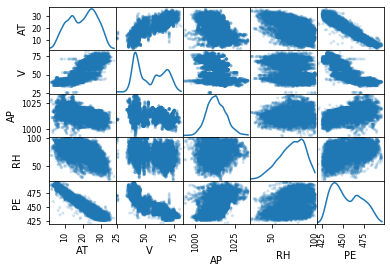

In [6]:
scatter_matrix(ccpp,alpha = 0.2, diagonal='kde')
plt.show()

iii.What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [7]:
desc = ccpp.describe()
desc.loc['interquartile'] = desc.loc['75%',:]- desc.loc['25%',:]
print(desc)

                        AT            V           AP           RH           PE
count          9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean             19.651231    54.305804  1013.259078    73.308978   454.365009
std               7.452473    12.707893     5.938784    14.600269    17.066995
min               1.810000    25.360000   992.890000    25.560000   420.260000
25%              13.510000    41.740000  1009.100000    63.327500   439.750000
50%              20.345000    52.080000  1012.940000    74.975000   451.550000
75%              25.720000    66.540000  1017.260000    84.830000   468.430000
max              37.110000    81.560000  1033.300000   100.160000   495.760000
interquartile    12.210000    24.800000     8.160000    21.502500    28.680000


(c)For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back
up your assertions. Are there any outliers that you would like to remove from
your data for each of these regression tasks?

In [8]:
cols_list = ['AT', 'V', 'AP', 'RH', 'PE']

uni_coef = []
for cols in cols_list:
    if cols != 'PE':
        x = ccpp[cols]
        y = ccpp['PE']
        x = sm.add_constant(x)
        mod = sm.OLS(y,x)
        fii = mod.fit()
        uni_coef.append(fii.params)
        paras = fii.summary().tables[1]
        print(paras)
        #find outliers
        np.set_printoptions(suppress = True)
        influence = fii.get_influence()
        cooks = influence.cooks_distance
        print('outliers',cooks)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.000     496.727     497.341
AT            -2.1713      0.007   -291.715      0.000      -2.186      -2.157
outliers (array([0.00000413, 0.00001112, 0.0000587 , ..., 0.0000018 , 0.00016707,
       0.00001878]), array([0.99999587, 0.99998888, 0.9999413 , ..., 0.9999982 , 0.99983295,
       0.99998122]))
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.000     517.061     518.542
V             -1.1681      0.007   -172.402      0.000      -1.181      -1.155
outliers (array([0.00004829, 0.00000001, 0.00049331, ..., 0.00000506, 0.00000156,
       0.00007568]), array([0.99995171, 0.99999999, 0.99950681, ..., 0.99999494, 0.9999984

(c)Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to backup your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks? 

Ans: From the coefficienct parameter, the two pairs AP&PE(1.49),RH&PE(0.46) have postive relationship, which means if one increases, the other one increases as well. On the other hand, AT and V have nagative coefficiencts. All p >|t| are 0.000 indicating a statistcal significant,that we can reject the null-hypothesis and accept the alternative hypothesis (coef!=0). From the scatter plot below, we can observe an obvious negative correlation of PE and AT. By using cooks distance, we could find some outliers there may affect our results.

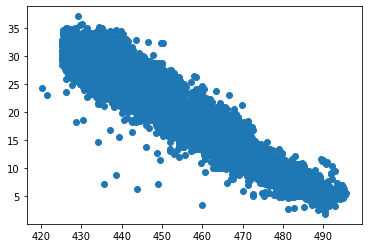

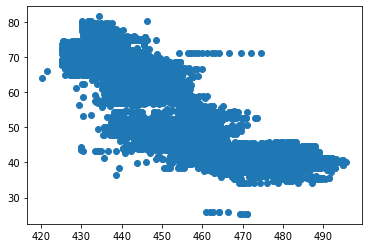

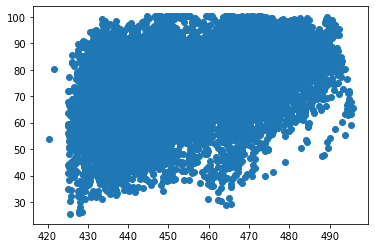

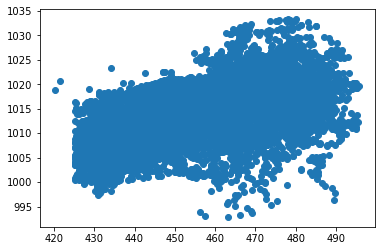

In [21]:
plt.scatter(ccpp['PE'],ccpp['AT'])
plt.show()
plt.scatter(ccpp['PE'],ccpp['V'])
plt.show()
plt.scatter(ccpp['PE'],ccpp['RH'])
plt.show()
plt.scatter(ccpp['PE'],ccpp['AP'])
plt.show()

d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0:βj = 0?

Ans: From the stats, we can see the coef of RH&PE turns to negative 0.16 from postive 0.46 of simple linear regression. At the same time, the other coefs all change to comparely smaller ones.
Since all of our p is < 0.005, we can say that all predictors could reject the null hypothesis.


In [22]:
X = ccpp[['AT', 'V', 'AP', 'RH']]
Y = ccpp['PE']
X=sm.add_constant(X)        #to add constant value in the model
model= sm.OLS(Y,X).fit()         #fitting the model
paras_multi = model.summary().tables[1]      #summary of the model predictions

print(paras_multi)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150


(e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis

Ans:
From the graph, we could see the AT is similar in two conditions, but for all other predictors, the multiple regression coefficients own a larger number comparing with univariate.


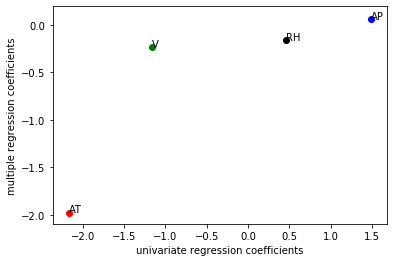

In [11]:
uni_coef2 = []
multi_coef = []
#cols_list
for i in range(0, len(uni_coef)):
    uni_coef2.append(uni_coef[i][1])
    multi_coef.append(model.params[i+1])

plt.xlabel('univariate regression coefficients')
plt.ylabel('multiple regression coefficients')

vocabulary = [1 , 2 , 3, 0]
my_colors = {1:'red',2:'green',3:'blue'}

for i,j in enumerate(uni_coef2):
    plt.scatter(uni_coef2[i] , multi_coef[i], color = my_colors.get(vocabulary[i], 'black'))
    
for i, label in enumerate(cols_list[:-1]):
    plt.annotate(label, (uni_coef2[i] , multi_coef[i]))
    
plt.show()

(f)Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictorX, fit a model of the form.

Since most p is < 0.005, we can see they are non-linear assciation. However, V has p > 0.005 which is no evidence to show it's nonlinear association.


In [12]:
#nonlinear
nl_df = pd.DataFrame()

for j in cols_list[:-1]:
    x = pd.Series(ccpp[j])
    nl_df['x^1'+j] = x
    nl_df['x^2'+j]= x**2
    nl_df['x^3'+j] = x**3

nl_df =sm.add_constant(nl_df)
        
model= sm.OLS(ccpp['PE'],nl_df).fit()

print(model.summary().tables[1])
print('r^2',model.rsquared)


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0330      0.003    -12.303      0.000      -0.038      -0.028
x^1AT         -1.9699      0.109    -18.070      0.000      -2.184      -1.756
x^2AT         -0.0320      0.006     -5.061      0.000      -0.044      -0.020
x^3AT          0.0011      0.000      9.930      0.000       0.001       0.001
x^1V           1.9157      0.272      7.033      0.000       1.382       2.450
x^2V          -0.0400      0.005     -8.128      0.000      -0.050      -0.030
x^3V           0.0002   2.92e-05      8.141      0.000       0.000       0.000
x^1AP        -11.1425      0.906    -12.303      0.000     -12.918      -9.367
x^2AP          0.0233      0.002     13.032      0.000       0.020       0.027
x^3AP      -1.166e-05    8.8e-07    -13.244      0.000   -1.34e-05   -9.93e-06
x^1RH          0.2848      0.133      2.147      0.0

(g)Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

Ans: from the stats, we can see that AT* AP,V* RH, AP* RH are not statistically significant cause they have a bigger p-value.


In [13]:
df = pd.DataFrame()

for i in range(0,len(cols_list[:-1])):
    for j in range(i+1,len(cols_list[:-1])):
        ser1 = pd.Series(data=ccpp[cols_list[i]])
        ser2 = pd.Series(data=ccpp[cols_list[j]])
        df[cols_list[i]+'*'+cols_list[j]] = ser1*ser2
for i in cols_list[:-1]:
    df[i] = ccpp[i]
# df_np = np.reshape(df_total, (-1,len(df)))

df =sm.add_constant(df)

model= sm.OLS(ccpp['PE'],df).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,685.7825,78.640,8.721,0.000,531.631,839.934
AT*V,0.0210,0.001,23.338,0.000,0.019,0.023
AT*AP,0.0018,0.002,0.752,0.452,-0.003,0.006
AT*RH,-0.0052,0.001,-6.444,0.000,-0.007,-0.004
V*AP,0.0068,0.001,5.135,0.000,0.004,0.009
V*RH,0.0008,0.000,1.716,0.086,-0.000,0.002
AP*RH,-0.0016,0.001,-2.125,0.034,-0.003,-0.000
AT,-4.3470,2.373,-1.832,0.067,-8.999,0.305
V,-7.6749,1.351,-5.682,0.000,-10.323,-5.027
AP,-0.1524,0.077,-1.983,0.047,-0.303,-0.002


(h)Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? 
Train the regression model on a randomly selected 70% subset of the data with all predictors. 

Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). 

Test both models on the remaining points and report your train and test MSEs.

In [14]:
train, test = train_test_split(ccpp, test_size=0.3)
test: pd.DataFrame()
train = ccpp.sample(frac=0.7) 

X = train[cols_list[:-1]]
Y = train["PE"]

X =sm.add_constant(X)
model= sm.OLS(Y,X).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,450.7826,11.682,38.588,0.000,427.882,473.683
AT,-1.9708,0.018,-107.379,0.000,-2.007,-1.935
V,-0.2331,0.009,-26.643,0.000,-0.250,-0.216
AP,0.0658,0.011,5.803,0.000,0.044,0.088
RH,-0.1593,0.005,-31.998,0.000,-0.169,-0.150


In [15]:
#interaction model training data
train_pd = pd.DataFrame()
for i in range(0,len(cols_list[:-1])):
    for j in range(i+1,len(cols_list[:-1])):
        ser1 = pd.Series(data=train[cols_list[i]])
        ser2 = pd.Series(data=train[cols_list[j]])
        train_pd[cols_list[i]+'*'+cols_list[j]] = ser1*ser2
    
for i in cols_list[:-1]:
    train_pd[i] = train[i]
train_pd=sm.add_constant(train_pd)
model= sm.OLS(Y,train_pd).fit()
print('interaction',model.summary().tables[1])

#interation training data MSE
#dropped ['AT*AP','V*RH', 'AP*RH']'s pvalue > 0.005

df1 = train_pd.drop(columns = ['AT*AP','V*RH','AP*RH'])
df1 =sm.add_constant(df1)
model1= sm.OLS(train['PE'],df1).fit()

print(model1.summary().tables[1])
print(model1.rsquared) #show the fitting

y_pred = model1.predict(df1)
y_true = train['PE']

print('trian(interaction) MSE:',mean_squared_error(y_true, y_pred))

interaction ==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        722.5484     93.750      7.707      0.000     538.768     906.329
AT*V           0.0213      0.001     19.795      0.000       0.019       0.023
AT*AP          0.0036      0.003      1.286      0.198      -0.002       0.009
AT*RH         -0.0049      0.001     -5.051      0.000      -0.007      -0.003
V*AP           0.0064      0.002      3.972      0.000       0.003       0.009
V*RH           0.0008      0.001      1.344      0.179      -0.000       0.002
AP*RH         -0.0012      0.001     -1.372      0.170      -0.003       0.001
AT            -6.2584      2.845     -2.199      0.028     -11.836      -0.680
V             -7.2178      1.630     -4.428      0.000     -10.413      -4.022
AP            -0.1880      0.092     -2.

In [16]:
#non-linear model training data

nl_df = pd.DataFrame()

for j in cols_list[:-1]:
    x = pd.Series(train[j])

    nl_df['x^1'+j] = x
    nl_df['x^2'+j]= x**2
    nl_df['x^3'+j] = x**3

nl_df1 =sm.add_constant(nl_df)
        
model= sm.OLS(train['PE'],nl_df1).fit()

print(model.summary().tables[1])
print('r^2',model.rsquared)

#Nonlinear training data MSE
#dropped RH, RH**2 and RH**3, which is not statistically significant so I dropped RH
nl_df_1 = nl_df.drop(columns = ['x^1RH','x^2RH','x^3RH'])
nl_df_1 =sm.add_constant(nl_df_1)
model_ln= sm.OLS(train['PE'],nl_df_1).fit()

print(model_ln.summary().tables[1])
print(model_ln.rsquared)

y_pred = model_ln.predict(nl_df_1)
y_true = train['PE']

print('trian(nonlinear) MSE:',mean_squared_error(y_true, y_pred))

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0357      0.003    -11.114      0.000      -0.042      -0.029
x^1AT         -2.0612      0.133    -15.545      0.000      -2.321      -1.801
x^2AT         -0.0255      0.008     -3.320      0.001      -0.041      -0.010
x^3AT          0.0010      0.000      7.283      0.000       0.001       0.001
x^1V           1.6594      0.316      5.252      0.000       1.040       2.279
x^2V          -0.0357      0.006     -6.228      0.000      -0.047      -0.024
x^3V           0.0002   3.41e-05      6.269      0.000       0.000       0.000
x^1AP        -12.0797      1.087    -11.114      0.000     -14.210      -9.949
x^2AP          0.0251      0.002     11.731      0.000       0.021       0.029
x^3AP      -1.258e-05   1.06e-06    -11.910      0.000   -1.46e-05   -1.05e-05
x^1RH          0.2104      0.158      1.329      0.1

In [17]:
#Interation test data
test_pd = pd.DataFrame()
for i in range(0,len(cols_list[:-1])):
    for j in range(i+1,len(cols_list[:-1])):
        ser1 = pd.Series(data=test[cols_list[i]])
        ser2 = pd.Series(data=test[cols_list[j]])
        test_pd[cols_list[i]+'*'+cols_list[j]] = ser1*ser2
    
for i in cols_list[:-1]:
    test_pd[i] = test[i]
test_pd=sm.add_constant(test_pd)
model= sm.OLS(test['PE'],test_pd).fit()
print('interaction',model.summary().tables[1])

#interation test data 
#dropped AT*AP,V*RH,AP*RH,
df2 = test_pd.drop(columns = ['AT*AP','V*RH','AP*RH'])
df2 = sm.add_constant(df2)
model2= sm.OLS(test['PE'],df2).fit()

print(model2.summary().tables[1])
print(model2.rsquared) #show the fitting

y_pred = model2.predict(df2)
y_true = test['PE']

print('test(interaction) MSE:',mean_squared_error(y_true, y_pred))

interaction ==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        668.3513    146.906      4.550      0.000     380.298     956.405
AT*V           0.0196      0.002     11.844      0.000       0.016       0.023
AT*AP         -0.0037      0.005     -0.819      0.413      -0.013       0.005
AT*RH         -0.0053      0.002     -3.513      0.000      -0.008      -0.002
V*AP           0.0083      0.003      3.284      0.001       0.003       0.013
V*RH           0.0009      0.001      1.006      0.315      -0.001       0.003
AP*RH         -0.0017      0.001     -1.198      0.231      -0.005       0.001
AT             1.2523      4.565      0.274      0.784      -7.700      10.204
V             -9.1778      2.570     -3.571      0.000     -14.217      -4.139
AP            -0.1351      0.144     -0.

In [18]:
#non-linear model testing data
nl_df = pd.DataFrame()

for j in cols_list[:-1]:
    x = pd.Series(test[j])

    nl_df['x^1'+j] = x
    nl_df['x^2'+j]= x**2
    nl_df['x^3'+j] = x**3

nl_df1 =sm.add_constant(nl_df)
        
model= sm.OLS(test['PE'],nl_df1).fit()

print(model.summary().tables[1])
print('r^2',model.rsquared)

#Nonlinear training data MSE
#dropped x^2AT, RH, RH**2 and RH**3, which is not statistically significant so I dropped RH
nl_df_1 = nl_df.drop(columns = ['x^1RH','x^2RH','x^3RH','x^2AT'])
nl_df_1 =sm.add_constant(nl_df_1)
model_ln= sm.OLS(test['PE'],nl_df_1).fit()

print(model_ln.summary().tables[1])
print(model_ln.rsquared)

y_pred = model_ln.predict(nl_df_1)
y_true = test['PE']

print('test(nonlinear) MSE:',mean_squared_error(y_true, y_pred))

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0374      0.005     -7.292      0.000      -0.047      -0.027
x^1AT         -2.0814      0.209     -9.959      0.000      -2.491      -1.672
x^2AT         -0.0254      0.012     -2.106      0.035      -0.049      -0.002
x^3AT          0.0010      0.000      4.777      0.000       0.001       0.001
x^1V           2.1160      0.524      4.039      0.000       1.089       3.143
x^2V          -0.0439      0.009     -4.627      0.000      -0.062      -0.025
x^3V           0.0003   5.62e-05      4.603      0.000       0.000       0.000
x^1AP        -12.6319      1.732     -7.292      0.000     -16.029      -9.235
x^2AP          0.0262      0.003      7.675      0.000       0.020       0.033
x^3AP      -1.311e-05   1.68e-06     -7.787      0.000   -1.64e-05   -9.81e-06
x^1RH          0.1508      0.257      0.588      0.5

(i)KNN Regression: i.Perform k-nearest neighbor regression for this dataset using both normalizedand raw features. Find the value of k∈ {1,2, . . . ,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

In [19]:
def knn(k, test_x, test_y, train_x,train_y):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(train_x, train_y)
    
    pred_y = knn.predict(train_x)
    train_score = mean_squared_error(train_y,pred_y)
    
    pred_test_y = knn.predict(test_x)
    test_score = mean_squared_error(test_y,pred_test_y)
    return train_score, test_score

k = []
k1 = []
for i in range(1,101):
    k.append(i)
    k1.append(1/i)

k_test = []
k_train = [] 
for i in k:
    model_train, model_test = knn(i, test[cols_list[:-1]], test['PE'], train[cols_list[:-1]],train['PE'])
    k_train.append(model_train)
    k_test.append(model_test)
    
plt.plot(k1,k_test,color='blue')
plt.plot(k1,k_train,color = 'pink')
plt.show()


k_testindex = []
for k_ in range(len(k_test)):
    if k_test[k_] == min(k_test):
        k_testindex.append(k_)
        
kstar_test = k[k_testindex[-1]] #4
lowest_test_error = min(k_test)

print("k gives the best fit:",kstar_test)
print("MSE:",lowest_test_error )

NameError: name 'KNeighborsRegressor' is not defined

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = preprocessing.MinMaxScaler()

X_train_minmax = min_max_scaler.fit_transform(train[cols_list[:-1]].to_numpy())
y_train = train['PE'].values.reshape(-1, 1) 
Y_train_minmax = min_max_scaler.fit_transform(y_train)
X_test_minmax = min_max_scaler.fit_transform(test[cols_list[:-1]].to_numpy())
y_test = test['PE'].values.reshape(-1, 1) 
Y_test_minmax = min_max_scaler.fit_transform(y_test)


k_test = [] 
k_train = [] 
for i in k:
    model_train, model_test = knn(i, X_test_minmax, Y_test_minmax, X_train_minmax,Y_train_minmax)
    k_train.append(model_train)
    k_test.append(model_test)
    
plt.plot(k1,k_test,color='blue') #test
plt.plot(k1,k_train,color = 'pink') #train
plt.show()


k_testindex = []
for k_ in range(len(k_test)):
    if k_test[k_] == min(k_test):
        k_testindex.append(k_)
        
kstar_test = k[k_testindex[-1]] #4
lowest_test_error = min(k_test)

print("k gives the best fit:",kstar_test)
print("MSE:",lowest_test_error )

(j)Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

KNN smallest MSE = 6.08 in raw data, and 0.00183 in normalized data. Linear Regression smallest MSE = 18.3 when using interaction method.
For this regression, knn doesn't perform as good as linear regression because in raw data, the best k = 1 which doesn't make sense even though the mse = 6 is extremely low. An overfitting problem may exist when k=1 in knn model. 

2. ISLR: 2.4.1
3. ISLR: 2.4.7

2. 
a)Better, because of a large simple size(n)
b)Worse, because of a small simple size
c)Better, because it's non-linear
d)Worse, because the error is large so as to negatively affect the flexible model which fits too much of the noise


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
X=[[0,3,0], [2,0,0],[0,1,3],[0,1,2],[-1,0,1],[1,1,1]]

print('3.a)',
      euclidean_distances(X, [[0,0,0]]))

3. 
b)Green, because we will find the nearest neighbor of x1=x2=x3=0 which is Obs.5(Green) with the lowest euclidean distance

c)Red, obs.5(Green),obs.6(Red),obs.2(Red) will be used to predict and red is the majority.

d)It should be small because the boundary will be non linear which is flexible if k is small.